## Introduction to other file types
#### Not so flat any more
In Chapter 1, you learned how to use the IPython magic command ! ls to explore your current working directory. You can also do this natively in Python using the library os, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.

import os
wd = os.getcwd()
os.listdir(wd)
Run this code in the IPython shell and answer the following questions. Ignore the files that begin with ..

Check out the contents of your current directory and answer the following questions: (1) which file is in your directory and NOT an example of a flat file; (2) why is it not a flat file?

In [1]:
ls

Chapter 1 - Introduction and flat files.ipynb
Chapter 2 - Importing data from other file types.ipynb
Chapter 3 - Working with relational databases in Python.ipynb
Chinook.sqlite
L-L1_LOSC_4_V1-1126259446-32.hdf5
battledeath.xlsx
digits_header.txt
disarea.dta
ja_data2.mat
mnist_kaggle_some_rows.TXT
moby_dick.TXT
sales.sas7bdat
seaslug.TXT
titanic_sub.csv


In [2]:
import os
wd = os.getcwd()
os.listdir(wd)

['Chapter 2 - Importing data from other file types.ipynb',
 'mnist_kaggle_some_rows.TXT',
 'disarea.dta',
 'Chapter 1 - Introduction and flat files.ipynb',
 'sales.sas7bdat',
 'moby_dick.TXT',
 'ja_data2.mat',
 'battledeath.xlsx',
 'digits_header.txt',
 'titanic_sub.csv',
 'Chinook.sqlite',
 'Chapter 3 - Working with relational databases in Python.ipynb',
 'L-L1_LOSC_4_V1-1126259446-32.hdf5',
 '.ipynb_checkpoints',
 'seaslug.TXT']

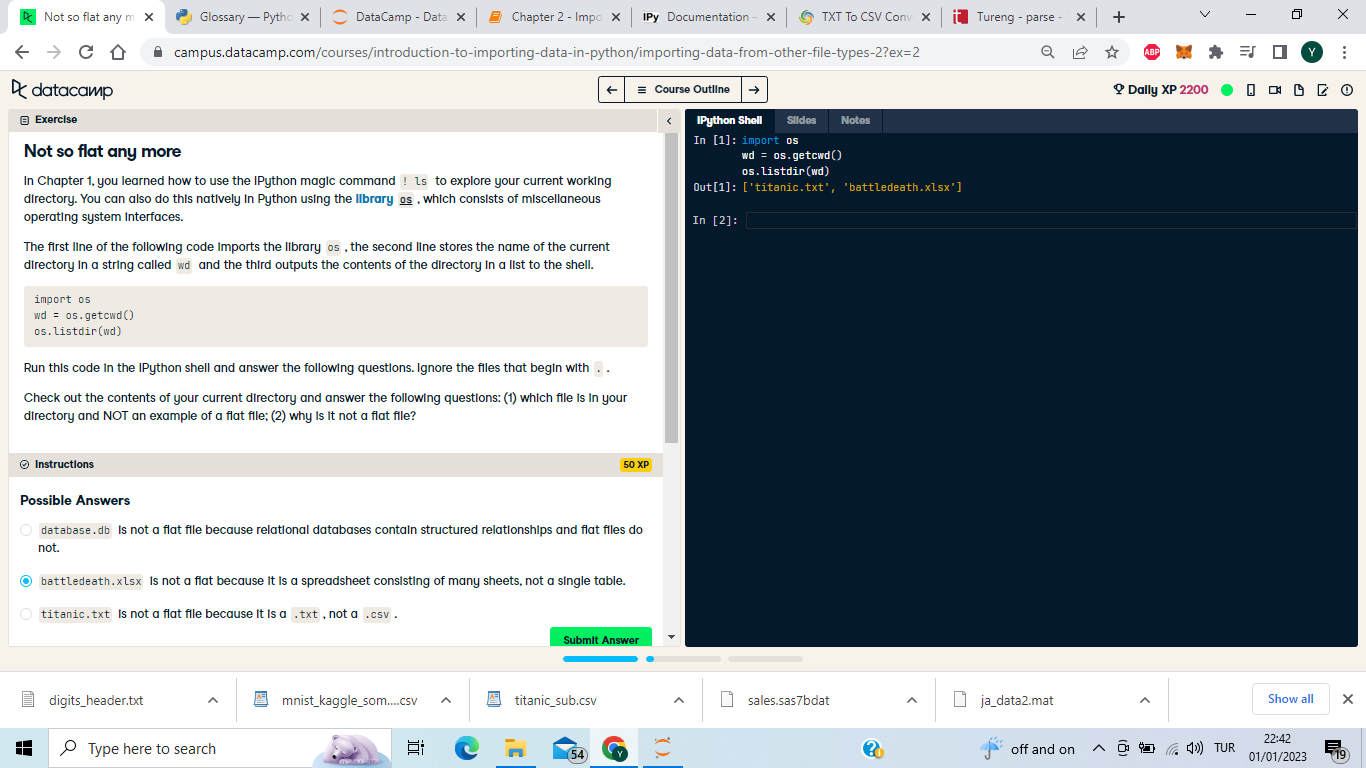

#### Loading a pickled file
There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In this exercise, you'll import the pickle package, open a previously pickled data structure from a file and load it.

In [3]:
# Import pickle package
import pickle 

# Open pickle file and load data: d
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

FileNotFoundError: [Errno 2] No such file or directory: 'data.pkl'

#### Listing sheets in Excel files
Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use pandas to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

Recall from the video that, given an Excel file imported into a variable spreadsheet, you can retrieve a list of the sheet names using the attribute spreadsheet.sheet_names.

Specifically, you'll be loading and checking out the spreadsheet 'battledeath.xlsx', modified from the Peace Research Institute Oslo's (PRIO) dataset. This data contains age-adjusted mortality rates due to war in various countries over several years.

In [4]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)


['2002', '2004']


#### Importing sheets from Excel files
In the previous exercises, you saw that the Excel file contains two sheets, '2002' and '2004'. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

The spreadsheet 'battledeath.xlsx' is already loaded as xls.

In [5]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


#### Customizing your spreadsheet import
Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

The spreadsheet 'battledeath.xlsx' is already loaded as xls.

As before, you'll use the method parse(). This time, however, you'll add the additional arguments skiprows, names and usecols. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

In [6]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())


               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


## Importing SAS/Stata files using pandas

#### Importing SAS files
In this exercise, you'll figure out how to import a SAS file as a DataFrame using SAS7BDAT and pandas. The file 'sales.sas7bdat' is already in your working directory and both pandas and matplotlib.pyplot have already been imported as follows:

import pandas as pd
import matplotlib.pyplot as plt
The data are adapted from the website of the undergraduate text book Principles of Econometrics by Hill, Griffiths and Lim.

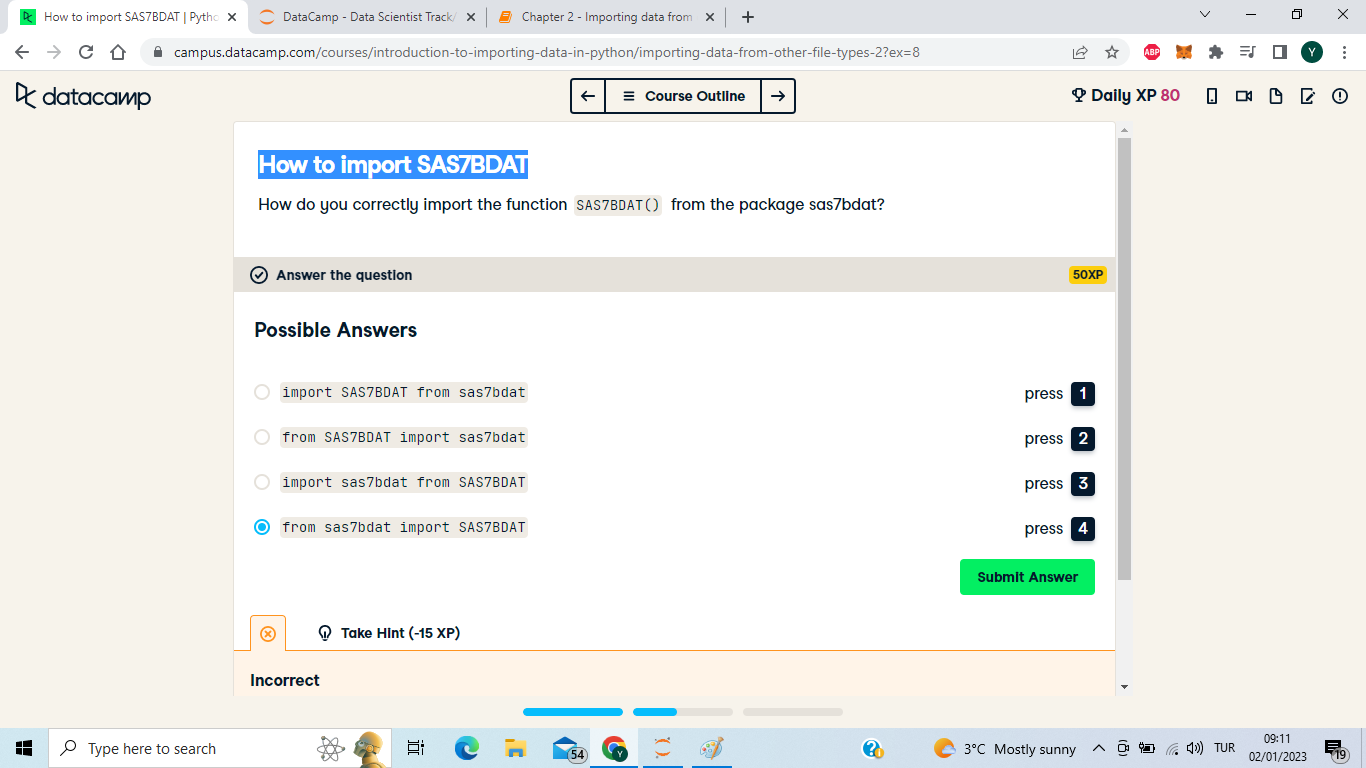

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


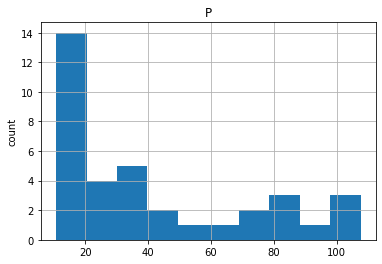

In [9]:
import matplotlib.pyplot as plt

# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

#### Importing Stata files
Here, you'll gain expertise in importing Stata files as DataFrames using the pd.read_stata() function from pandas. The last exercise's file, 'disarea.dta', is still in your working directory.

#### 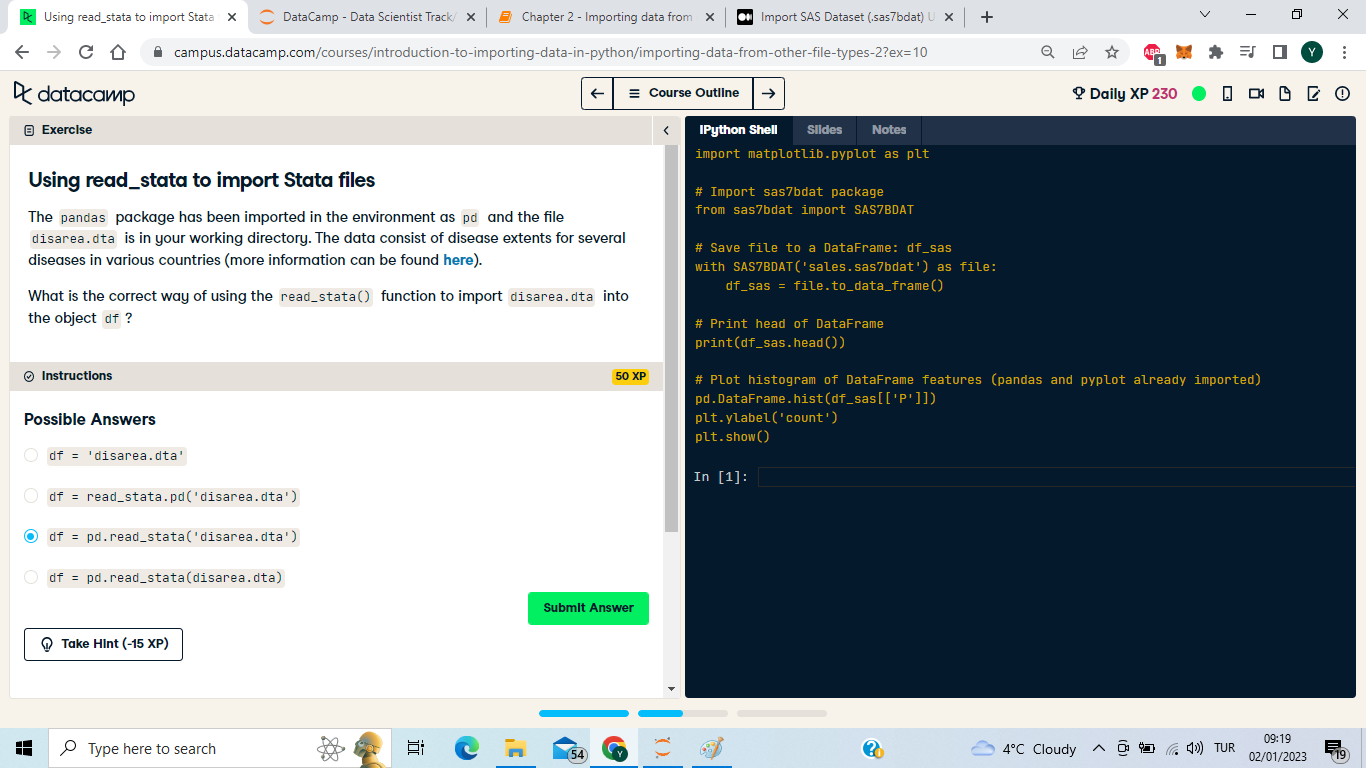

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

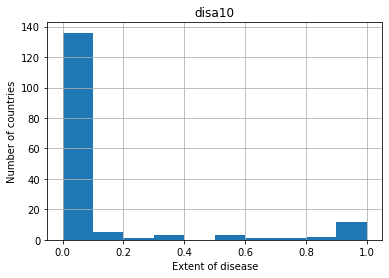

In [10]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


## Importing HDF5 files

#### Using File to import HDF5 files
The h5py package has been imported in the environment and the file LIGO_data.hdf5 is loaded in the object h5py_file.

What is the correct way of using the h5py function, File(), to import the file in h5py_file into an object, h5py_data, for reading only?

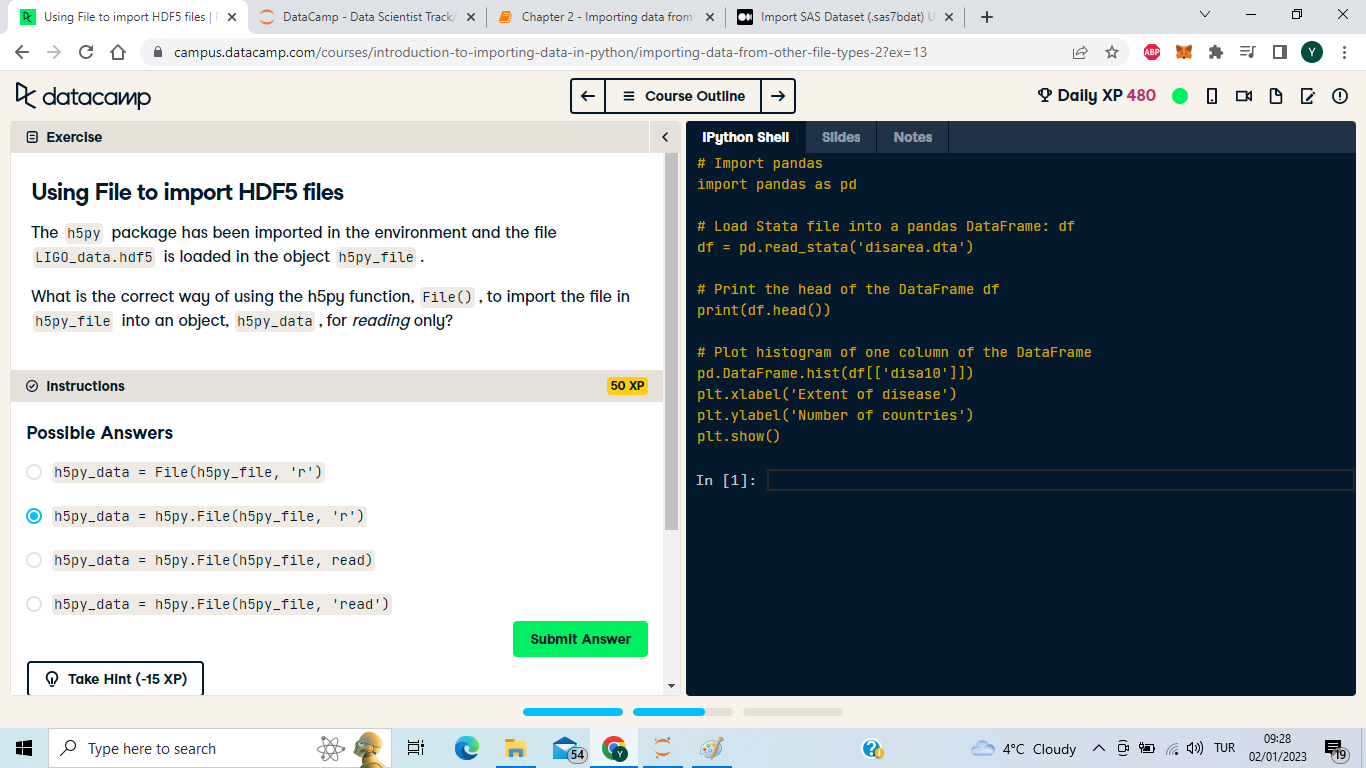

#### Using h5py to import HDF5 files
The file 'LIGO_data.hdf5' is already in your working directory. In this exercise, you'll import it using the h5py library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

You can find the LIGO data plus loads of documentation and tutorials here. There is also a great tutorial on Signal Processing with the data here.

In [12]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'L-L1_LOSC_4_V1-1126259446-32.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)


<class 'h5py._hl.files.File'>
meta
quality
strain


Strain


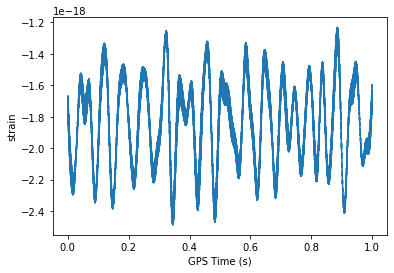

In [13]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = np.array(data['strain']['Strain'])

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


## Importing MATLAB files

#### Loading .mat files
In this exercise, you'll figure out how to load a MATLAB file using scipy.io.loadmat() and you'll discover what Python datatype it yields.

The file 'albeck_gene_expression.mat' is in your working directory. This file contains gene expression data from the Albeck Lab at UC Davis. You can find the data and some great documentation here.

In [15]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('ja_data2.mat')

# Print the datatype type of mat
print(type(mat))


<class 'dict'>


#### The structure of .mat in Python
Here, you'll discover what is in the MATLAB dictionary that you loaded in the previous exercise.

The file 'albeck_gene_expression.mat' is already loaded into the variable mat. The following libraries have already been imported as follows:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
Once again, this file contains gene expression data from the Albeck Lab at UCDavis. You can find the data and some great documentation here.

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


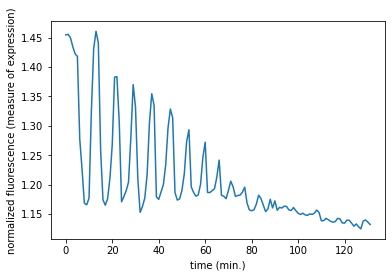

In [16]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()
